# **Credit Card Churn Analysis**

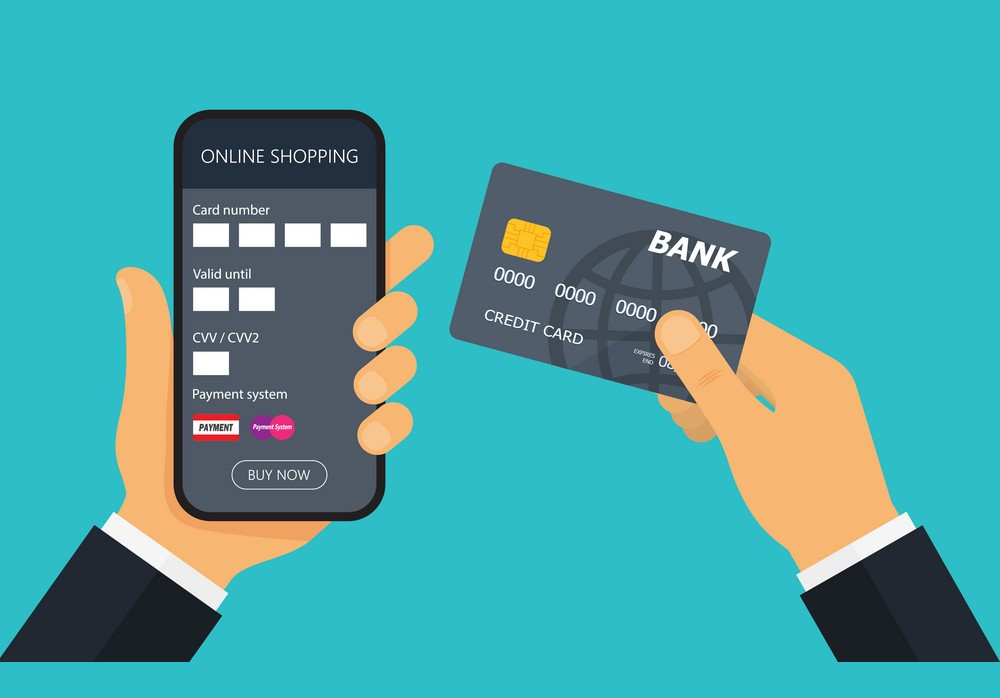

Credit cards are one of the major sources of revenue for banks. Given that customer acquisition costs are higher than customer retention costs, it is important for banks to measure a customer's likelihood to churn such that they could proactively take targeted preventive actions. 

In this project, we will explore the credit card customer data to identify the factors of attrition based on their demographic profile, financial status, and transaction history. 

This dataset contains 10000 customers of which 16% have churned. The dataset was obtained from Kaggle and can be accessed through this link: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

The list of variables and their description are found below.

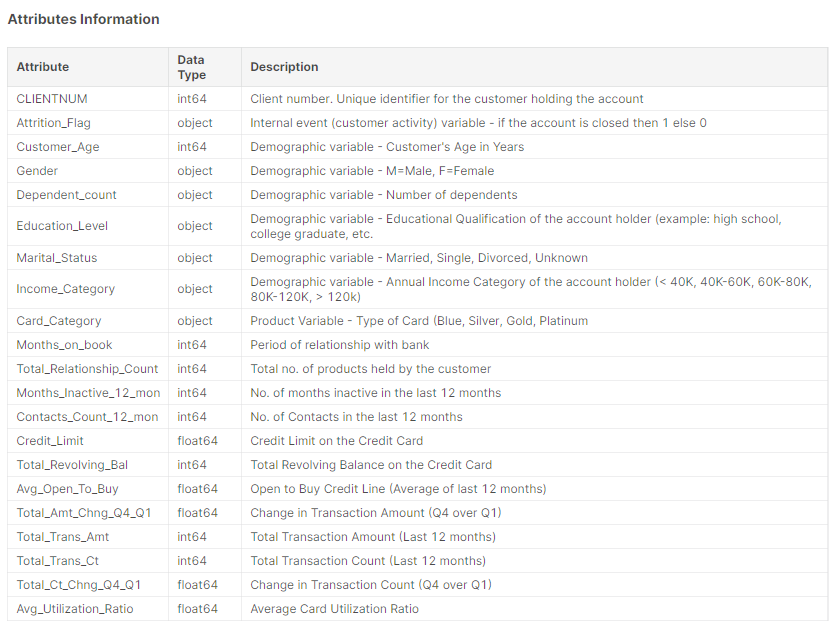

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = '/content/drive/MyDrive/'
data = pd.read_csv(data_dir+'BankChurners.csv')

data = data.iloc[:, :-2] # removes the last two columns

In [4]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


##**Data Exploration**

In [5]:
# Check for missing values
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
data[['CLIENTNUM', 'Attrition_Flag']].groupby(['Attrition_Flag']).count()

,CLIENTNUM
Attrition_Flag,
Attrited Customer,1627
Existing Customer,8500


In [7]:
demographic_cols = ['CLIENTNUM','Customer_Age', 'Marital_Status', 'Gender']
ordinal_cols = ['Education_Level', 'Income_Category', 'Card_Category']
numeric_cols = [x for x in data.columns.to_list() if (x not in ordinal_cols) and (x not in demographic_cols) and (x != 'Attrition_Flag')]

In [8]:
numeric_cols.append('Attrition_Flag')

In [9]:
data.iloc[:, 1:].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [10]:
grp_means = data[numeric_cols].groupby(['Attrition_Flag']).mean().transpose()

In [11]:
grp_means

Attrition_Flag,Attrited Customer,Existing Customer
Dependent_count,2.402581,2.335412
Months_on_book,36.178242,35.880588
Total_Relationship_Count,3.279656,3.914588
Months_Inactive_12_mon,2.693301,2.273765
Contacts_Count_12_mon,2.972342,2.356353
Credit_Limit,8136.039459,8726.877518
Total_Revolving_Bal,672.822987,1256.604118
Avg_Open_To_Buy,7463.216472,7470.273400
Total_Amt_Chng_Q4_Q1,0.694277,0.772510
Total_Trans_Amt,3095.025814,4654.655882


In [12]:
## Hypothesis testing to check whether the means are significantly different between the two groups.

from scipy.stats import mannwhitneyu

def compare_means(col_list, means_df, ha_dict):
  means_df['p_val'] = 0.00
  means_df['Ha'] = 'two-sided'
  means_df['Significant?'] = 'No'


  for col in col_list:
    test_stat, p_val = mannwhitneyu(data[data['Attrition_Flag'] == 'Attrited Customer'][col], 
                                    data[data['Attrition_Flag'] == 'Existing Customer'][col],
                                    axis=0, 
                                    alternative=ha_dict[col])

    means_df.loc[col, 'p_val'] = p_val
    means_df.loc[col, 'Ha'] = ha_dict[col]

    if p_val > 0.05:
      means_df.loc[col, 'Significant?'] = 'No'
      
    else:
      means_df.loc[col, 'Significant?'] = 'Yes'

  return means_df

In [13]:
numeric_cols.remove('Attrition_Flag')

In [14]:
numeric_cols_ha = {
    'Dependent_count': 'greater',
    'Months_on_book': 'greater',
    'Total_Relationship_Count': 'less',
    'Months_Inactive_12_mon': 'greater',
    'Contacts_Count_12_mon': 'greater',
    'Credit_Limit': 'less',
    'Total_Revolving_Bal': 'less',
    'Avg_Open_To_Buy': 'less',
    'Total_Amt_Chng_Q4_Q1': 'less',
    'Total_Trans_Amt': 'less',
    'Total_Trans_Ct': 'less',
    'Total_Ct_Chng_Q4_Q1': 'less',
    'Avg_Utilization_Ratio': 'less'
}

In [15]:
compare_means(numeric_cols, grp_means, numeric_cols_ha)

Attrition_Flag,Attrited Customer,Existing Customer,p_val,Ha,Significant?
Dependent_count,2.402581,2.335412,1.736443e-02,greater,Yes
Months_on_book,36.178242,35.880588,6.183358e-02,greater,No
Total_Relationship_Count,3.279656,3.914588,1.452858e-51,less,Yes
Months_Inactive_12_mon,2.693301,2.273765,2.711558e-67,greater,Yes
Contacts_Count_12_mon,2.972342,2.356353,5.554442e-81,greater,Yes
Credit_Limit,8136.039459,8726.877518,1.503920e-07,less,Yes
Total_Revolving_Bal,672.822987,1256.604118,9.578393e-130,less,Yes
Avg_Open_To_Buy,7463.216472,7470.273400,9.971739e-01,less,No
Total_Amt_Chng_Q4_Q1,0.694277,0.772510,5.322372e-25,less,Yes
Total_Trans_Amt,3095.025814,4654.655882,1.359505e-112,less,Yes


**Insights**

At 0.05 significance level, there is sufficient evidence that Attrited customers:
*   Tend to have more dependents than existing customers.  
*   Tend to hold fewer products than exisiting customers
*   Are inactive for an average of 2.6 months in a year compared to existing customers who are inactive for 2.3 months in a year. 
*   Have more contacts than existing customers
*   Have a lower average credit limit of 8100 USD than existing customers who have an average credit limit of 8700 USD
*   Have lower average revolving balance of 670 USD than existing customers who have an average revolving balance of 1200 USD
*   Have lower change in transaction amount from Q1 to Q4 compared to existing customers
*   Have a lower average annual transaction amount of 3095 USD compared to existing customers whose average annual transaction amount is 4600 USD
*   Have a lower average transaction count in the last 12 months than existing customers
*   Have a lower average change in transaction count from Q4 to Q1 than existing customers
*   Have a lower average utilization ratio of 16% compared to existing customers whose average utilization ratio is 29%.


There is no sufficient evidence to conclude that attrited and existing customers differ in their 1.) average period of relationship with the bank and 2.) the amount they are willing to buy to increase their credit limit. 









**Chi-square of Independence for categorical variables**

In [16]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_test (col1, col2, sig_level=0.05):
  stat, p, dof, expected = chi2_contingency(pd.crosstab(data[col1], data[col2]))
  if p<= sig_level:
    print('Reject Ho. ' + col1 + ' and ' + col2 + ' are NOT independent.')
  else: 
    print('Do NOT reject Ho. ' + col1 + ' and ' + col2 + ' are independent.')

In [17]:
pd.crosstab(data['Attrition_Flag'], data['Gender'])

Gender,F,M
Attrition_Flag,,
Attrited Customer,930,697
Existing Customer,4428,4072


In [18]:
chi_test('Attrition_Flag', 'Gender')

Reject Ho. Attrition_Flag and Gender are NOT independent.


In [19]:
pd.crosstab(data['Attrition_Flag'], data['Education_Level'])

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Attrition_Flag,,,,,,,
Attrited Customer,154,95,487,306,92,237,256
Existing Customer,859,356,2641,1707,424,1250,1263


In [20]:
chi_test('Attrition_Flag', 'Education_Level')

Do NOT reject Ho. Attrition_Flag and Education_Level are independent.


In [21]:
pd.crosstab(data['Attrition_Flag'], data['Marital_Status'])

Marital_Status,Divorced,Married,Single,Unknown
Attrition_Flag,,,,
Attrited Customer,121,709,668,129
Existing Customer,627,3978,3275,620


In [22]:
chi_test('Attrition_Flag', 'Marital_Status')

Do NOT reject Ho. Attrition_Flag and Marital_Status are independent.


In [23]:
pd.crosstab(data['Attrition_Flag'], data['Income_Category'])

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Attrition_Flag,,,,,,
Attrited Customer,126,271,189,242,612,187
Existing Customer,601,1519,1213,1293,2949,925


In [24]:
chi_test('Attrition_Flag', 'Income_Category')

Reject Ho. Attrition_Flag and Income_Category are NOT independent.


In [25]:
pd.crosstab(data['Attrition_Flag'], data['Card_Category'])

Card_Category,Blue,Gold,Platinum,Silver
Attrition_Flag,,,,
Attrited Customer,1519,21,5,82
Existing Customer,7917,95,15,473


In [26]:
chi_test('Attrition_Flag', 'Card_Category')

Do NOT reject Ho. Attrition_Flag and Card_Category are independent.


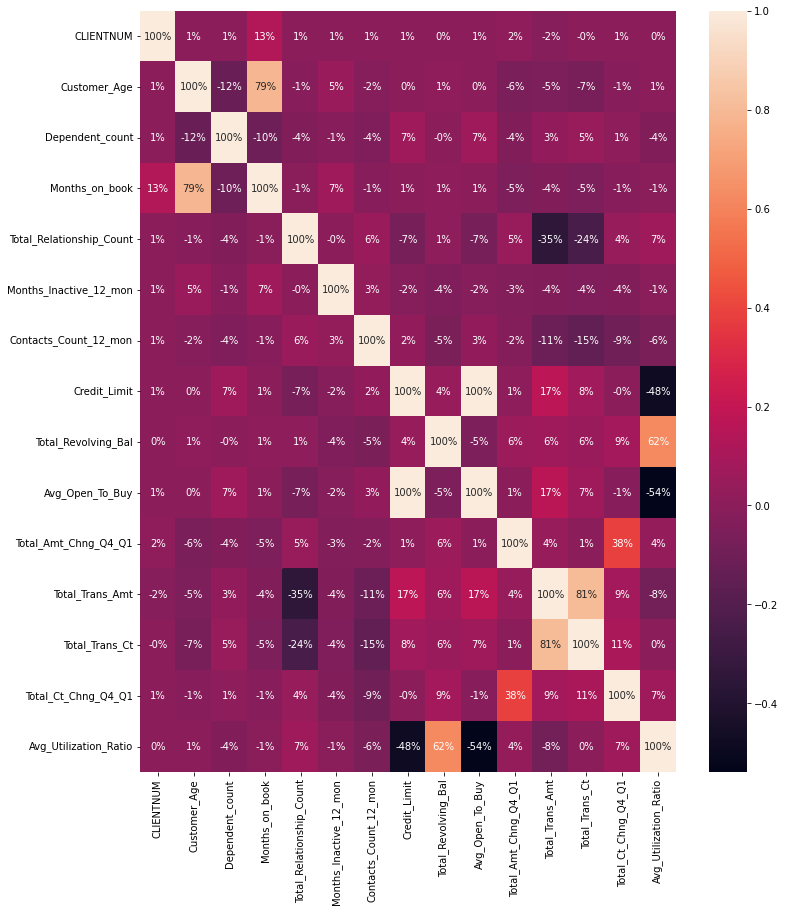

In [27]:
# Visualize correlation among the independent variables
plt.subplots(figsize=(12,14))
sns.heatmap(data.corr(), annot = True, fmt = '.0%')

Moderate to Strong correlation is observed in the ff. pairs of variables:
- Customer Age and Months on Book (79%)
- Avg_Open_To_Buy and Credit Limit (100%)
- Total_Trans_Ct and Total_Trans_Amt (81%)
- Avg_Utilization_Ratio and Total_Revolving_Bal (62%)

Only one variabe per pair would be included in the model in order to avoid multicollinearity.

##**Data Pre-processing**

Based on the results of the data exploration the ff. variables will be excluded for modelling as they are either not associated with the response variable, attrition_flag, or they are highly correlated with another independent variable.

In [28]:
to_drop = ['Months_on_book', 'Education_Level', 'Marital_Status', 'Card_Category', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Revolving_Bal']

In [29]:
data.drop(to_drop, axis=1, inplace=True)

In [30]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,$60K - $80K,5,1,3,12691.0,1.335,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Less than $40K,6,1,2,8256.0,1.541,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,$80K - $120K,4,1,0,3418.0,2.594,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,Less than $40K,3,4,1,3313.0,1.405,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,$60K - $80K,5,1,0,4716.0,2.175,28,2.500,0.000


In [31]:
demographic_cols = ['Customer_Age', 'Gender']
ordinal_cols = ['Income_Category']
numeric_cols = [x for x in data.columns.to_list() if (x not in ordinal_cols) and (x not in demographic_cols) and (x != 'Attrition_Flag')]

In [32]:
# Ordinal Encoding
scale_mapper = {'Unknown': 0,
                'Less than $40K': 1,
                '$40K - $60K': 2,
                '$60K - $80K': 3,
                '$80K - $120K': 4,
                '$120K +': 5
                }
data["Income_Category_Scale"] = data["Income_Category"].replace(scale_mapper)

In [33]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income_Category_Scale
0,768805383,Existing Customer,45,M,3,$60K - $80K,5,1,3,12691.0,1.335,42,1.625,0.061,3
1,818770008,Existing Customer,49,F,5,Less than $40K,6,1,2,8256.0,1.541,33,3.714,0.105,1
2,713982108,Existing Customer,51,M,3,$80K - $120K,4,1,0,3418.0,2.594,20,2.333,0.000,4
3,769911858,Existing Customer,40,F,4,Less than $40K,3,4,1,3313.0,1.405,20,2.333,0.760,1
4,709106358,Existing Customer,40,M,3,$60K - $80K,5,1,0,4716.0,2.175,28,2.500,0.000,3


In [34]:
# Scale numeric features
for column in numeric_cols:
  data[column] = data[column]/data[column].max()

In [35]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income_Category_Scale
0,0.928124,Existing Customer,45,M,0.6,$60K - $80K,0.833333,0.166667,0.500000,0.367685,0.392994,0.302158,0.437534,0.061061,3
1,0.988443,Existing Customer,49,F,1.0,Less than $40K,1.000000,0.166667,0.333333,0.239193,0.453636,0.237410,1.000000,0.105105,1
2,0.861940,Existing Customer,51,M,0.6,$80K - $120K,0.666667,0.166667,0.000000,0.099027,0.763615,0.143885,0.628164,0.000000,4
3,0.929460,Existing Customer,40,F,0.8,Less than $40K,0.500000,0.666667,0.166667,0.095984,0.413600,0.143885,0.628164,0.760761,1
4,0.856054,Existing Customer,40,M,0.6,$60K - $80K,0.833333,0.166667,0.000000,0.136632,0.640271,0.201439,0.673129,0.000000,3


In [36]:
# Remove demogrpahic and categorical columns
data.drop(demographic_cols, axis=1, inplace=True)
data.drop(ordinal_cols, axis=1, inplace=True)

In [37]:
data.head()

,CLIENTNUM,Attrition_Flag,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income_Category_Scale
0,0.928124,Existing Customer,0.6,0.833333,0.166667,0.500000,0.367685,0.392994,0.302158,0.437534,0.061061,3
1,0.988443,Existing Customer,1.0,1.000000,0.166667,0.333333,0.239193,0.453636,0.237410,1.000000,0.105105,1
2,0.861940,Existing Customer,0.6,0.666667,0.166667,0.000000,0.099027,0.763615,0.143885,0.628164,0.000000,4
3,0.929460,Existing Customer,0.8,0.500000,0.666667,0.166667,0.095984,0.413600,0.143885,0.628164,0.760761,1
4,0.856054,Existing Customer,0.6,0.833333,0.166667,0.000000,0.136632,0.640271,0.201439,0.673129,0.000000,3


In [38]:
data['Attrition_Flag'] = np.where(data['Attrition_Flag'] == 'Existing Customer', 0, 1)

In [39]:
data.head()

,CLIENTNUM,Attrition_Flag,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income_Category_Scale
0,0.928124,0,0.6,0.833333,0.166667,0.500000,0.367685,0.392994,0.302158,0.437534,0.061061,3
1,0.988443,0,1.0,1.000000,0.166667,0.333333,0.239193,0.453636,0.237410,1.000000,0.105105,1
2,0.861940,0,0.6,0.666667,0.166667,0.000000,0.099027,0.763615,0.143885,0.628164,0.000000,4
3,0.929460,0,0.8,0.500000,0.666667,0.166667,0.095984,0.413600,0.143885,0.628164,0.760761,1
4,0.856054,0,0.6,0.833333,0.166667,0.000000,0.136632,0.640271,0.201439,0.673129,0.000000,3


In [40]:
data['Attrition_Flag'].unique()

array([0, 1])

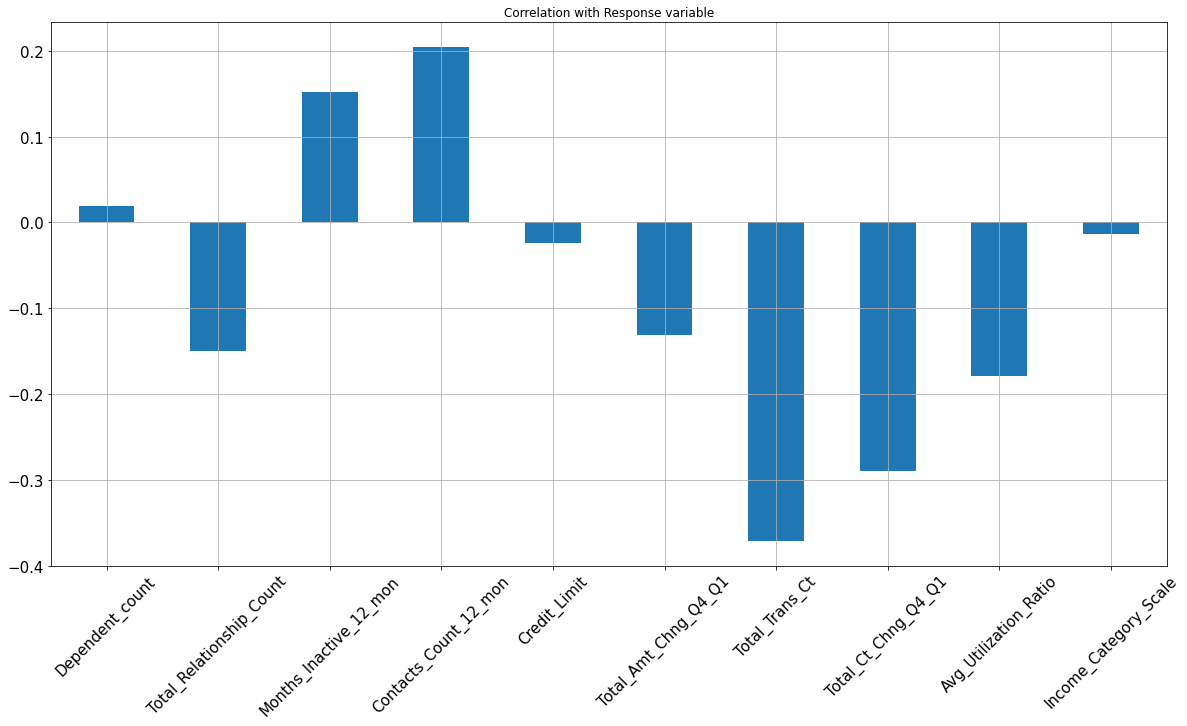

In [41]:
## Correlation with Response Variable
data.drop(columns = ['CLIENTNUM', 'Attrition_Flag']).corrwith(data.Attrition_Flag).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True);

**Insights**



Based on the correlation plot, a user's likelihood to churn is positively correlated with the length of time that he/she is inactive and the number of contacts that he/she has. Meanwhile, a user's likelihood to churn is inversely related to the number of products held, total transaction count, total amt. change from Q1 to Q4, total change in transaction counts from Q1 to Q4, and average utilization ratio.

## **Predictive Modelling** ##

In [42]:
# Create training and testing sets

x = pd.concat([data['CLIENTNUM'], data.iloc[:, 2:]], axis=1)
y = pd.concat([data['CLIENTNUM'], data.iloc[:, 1]], axis=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)


print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

print ('The shape of X_test is:', X_test.shape)
print ('The shape of y_test is: ', y_test.shape)
print ('Number of rows in the test set:', len(X_test))

The shape of X_train is: (8101, 11)
The shape of y_train is:  (8101, 2)
Number of training examples (m): 8101
The shape of X_test is: (2026, 11)
The shape of y_test is:  (2026, 2)
Number of rows in the test set: 2026


### **Logistic Regression** ###

---



In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn import metrics 

In [44]:
log_reg = LogisticRegression(random_state=0).fit(X_train.iloc[:, 1:], y_train.iloc[:, 1])

In [45]:
y_pred = log_reg.predict(X_test.iloc[:, 1:])

In [46]:
print(classification_report(y_test.iloc[:, 1],y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1717
           1       0.72      0.45      0.56       309

    accuracy                           0.89      2026
   macro avg       0.81      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026



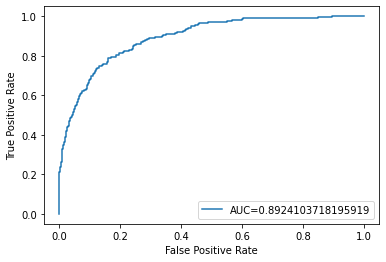

In [47]:
#define metrics
y_pred_proba = log_reg.predict_proba(X_test.iloc[:, 1:])[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test.iloc[:, 1],  y_pred_proba)
auc = metrics.roc_auc_score(y_test.iloc[:, 1], y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Insights**

The model was able to correctly classify 89% of the observations in the test set. The precision score is 72%, which means that of all customers predicted to churn, 72% are correct. Meanwhile, the recall score is 45%, which means that the model was able to predict 45% churn cases out of all the actual churn cases. Combining the precision and recall metrics, the F1-Score is 56%. 


The AUC is 89.24%. This means that the model will be able to distinguish between the customers who will churn and those who will stay 89.24% of the time.

In [48]:
# Analyzing Coefficients - determine which features have greater weight in predicting response variable
pd.concat([pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(log_reg.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,Dependent_count,0.574738
1,Total_Relationship_Count,-2.968285
2,Months_Inactive_12_mon,2.566028
3,Contacts_Count_12_mon,2.443940
4,Credit_Limit,-0.908348
5,Total_Amt_Chng_Q4_Q1,-1.137223
6,Total_Trans_Ct,-7.890510
7,Total_Ct_Chng_Q4_Q1,-7.223058
8,Avg_Utilization_Ratio,-2.431157
9,Income_Category_Scale,-0.111223


The top three features that have the most weight in predicting a customer's likelihood to churn would be Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, and Total_Relationship_Count.

### **Random Forest** ###

---



In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

random_forest = RandomForestClassifier(random_state=0, criterion='entropy')

random_forest.fit(X_train.iloc[:, 1:], y_train.iloc[:, 1])

RandomForestClassifier(criterion='entropy', random_state=0)

In [50]:
y_pred_rf = random_forest.predict(X_test.iloc[:, 1:])

In [51]:
print(classification_report(y_test.iloc[:, 1],y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1717
           1       0.81      0.62      0.71       309

    accuracy                           0.92      2026
   macro avg       0.87      0.80      0.83      2026
weighted avg       0.92      0.92      0.92      2026



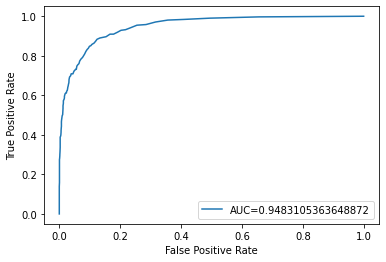

In [52]:
#define metrics
y_pred_proba = random_forest.predict_proba(X_test.iloc[:, 1:])[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test.iloc[:, 1],  y_pred_proba)
auc = metrics.roc_auc_score(y_test.iloc[:, 1], y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The model was able to correctly classify 92% of the observations in the test set. The precision score is 81%, which means that of all customers predicted to churn, 81% are correct. Meanwhile, the recall score is 62%, which means that the model was able to predict 62% churn cases out of all the actual churn cases. Combining the precision and recall metrics, the F1-Score is 71%.

The AUC is 94.83%. This means that the model will be able to distinguish between the customers who will churn and those who will stay 94.83% of the time.

The random forest algorithm performed better than logistic regression across all classification metrics. 

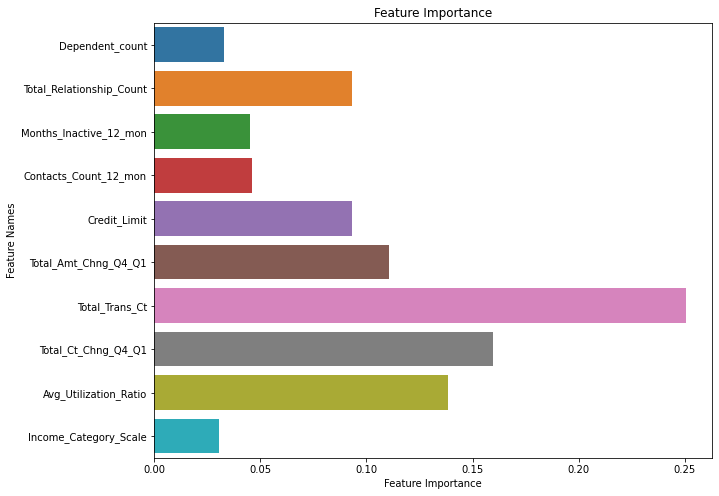

In [53]:
# Feature importance

#Define size of bar plot
plt.figure(figsize=(10,8))
sns.barplot(x=random_forest.feature_importances_, y=np.array(x.drop(columns = ['CLIENTNUM']).columns))
#Add chart labels
plt.title('Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.show()

### **Boosted Tree** ###

---



In [54]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train.iloc[:, 1:], y_train.iloc[:, 1])

y_pred_xgb = xgb.predict(X_test.iloc[:, 1:])

In [55]:
print(classification_report(y_test.iloc[:, 1],y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1717
           1       0.85      0.60      0.70       309

    accuracy                           0.92      2026
   macro avg       0.89      0.79      0.83      2026
weighted avg       0.92      0.92      0.92      2026



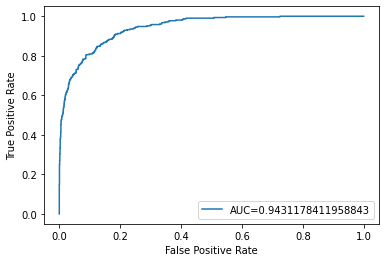

In [56]:
#define metrics
y_pred_proba = xgb.predict_proba(X_test.iloc[:, 1:])[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test.iloc[:, 1],  y_pred_proba)
auc = metrics.roc_auc_score(y_test.iloc[:, 1], y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Insights**

The XGBoost model was able to correctly classify 92% of the test data. Of all the customers predicted to churn, 85% were correct.  In terms of recall, the model was able to identify 60% of customers who actually churned. The F1-Score is 70%. 

The AUC is 94.31%, which means that the model is able to distinguish between customers who will churn and will not churn 94.31% of the time.

XGBoost outperformed logistic regression across all the classification metrics. It achieved a slightly better precision of 85% compared to random forest whose precision is 81%. However, its recall, F1-Score, and AUC are slightly lower than that of random forest.

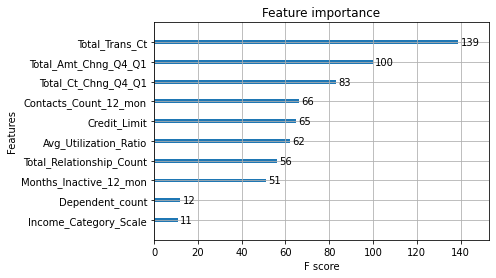

In [57]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgb)
pyplot.show()

The top three features that have the most weight for predicting attrition are Total_Trans_Ct, total_Amt_Chnge_Q4_Q1, and Total_Ct_Chng_Q4_Q1. 

### **Neural Network** ###

---



In [58]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

In [59]:
nn_model = Sequential([
    Dense(units = 10, activation = 'linear'),
    Dense(units = 5, activation = 'linear'),
    Dense(units = 1, activation = 'linear')
])
nn_model.compile(loss=BinaryCrossentropy(from_logits=True), optimizer='adam')

In [60]:
nn_model.fit(X_train.iloc[:, 1:], y_train.iloc[:, 1], epochs=20)

Epoch 1/20
254/254 [==============================] - 1s 2ms/step - loss: 0.5341
Epoch 2/20
254/254 [==============================] - 0s 2ms/step - loss: 0.4062
Epoch 3/20
254/254 [==============================] - 0s 2ms/step - loss: 0.3612
Epoch 4/20
254/254 [==============================] - 0s 2ms/step - loss: 0.3165
Epoch 5/20
254/254 [==============================] - 0s 2ms/step - loss: 0.2928
Epoch 6/20
254/254 [==============================] - 0s 2ms/step - loss: 0.2847
Epoch 7/20
254/254 [==============================] - 0s 2ms/step - loss: 0.2803
Epoch 8/20
254/254 [==============================] - 0s 2ms/step - loss: 0.2779
Epoch 9/20
254/254 [==============================] - 0s 2ms/step - loss: 0.2778
Epoch 10/20
254/254 [==============================] - 0s 2ms/step - loss: 0.2757
Epoch 11/20
254/254 [==============================] - 0s 2ms/step - loss: 0.2755
Epoch 12/20
254/254 [==============================] - 0s 2ms/step - loss: 0.2749
Epoch 13/20
254/254 [====

In [61]:
logit = nn_model(X_test.iloc[:, 1:].to_numpy())

In [62]:
y_pred_prob_nn = tf.nn.sigmoid(logit) #predicted probabilities

In [63]:
y_pred_nn = np.where(y_pred_prob_nn.numpy().flatten() > 0.5, 1, 0)

In [64]:
print(classification_report(y_test.iloc[:,1],y_pred_nn))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1717
           1       0.69      0.50      0.58       309

    accuracy                           0.89      2026
   macro avg       0.80      0.73      0.76      2026
weighted avg       0.88      0.89      0.88      2026



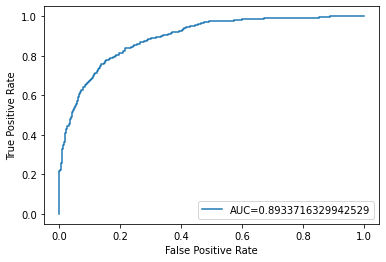

In [65]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test.iloc[:,1],  y_pred_prob_nn)
auc = metrics.roc_auc_score(y_test.iloc[:,1], y_pred_prob_nn)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Insights**

The neural network model was able to correctly classify 89% of the test data. Of all the customers predicted to churn, 68% were correct. In terms of recall, the model was able to identify 51% of customers who actually churned. The F1-Score is 59%.

The AUC is 89.3%, which means that the model is able to distinguish between customers who will churn and will not churn 89.3% of the time.

The neural network outperformed logistic regression in the recall and f1-score metrics. However, it returned the lowest AUC score among the models considered.


## **Final Model and Predictions**

Based on the classification metrics, the random forest model will be selected since it achieved the highest AUC of 94.8%. Its precision, recall, and accuracy are also high relative to the other models.


In [66]:
y_test.reset_index(drop=True, inplace=True)
final_pred = pd.DataFrame(y_pred_rf, columns = ['predicted_churn'])

In [67]:
final_results = pd.concat([y_test, final_pred], axis=1)
final_results

,CLIENTNUM,Attrition_Flag,predicted_churn
0,0.988604,0,0
1,0.863351,1,1
2,0.952722,0,0
3,0.866390,0,0
4,0.862862,0,0
...,...,...,...
2021,0.857383,0,0
2022,0.870036,0,0
2023,0.856098,1,0
2024,0.859415,0,0
